X:  [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
Predicted probabilities: [0.037 0.065 0.112 0.186 0.293 0.429 0.576 0.712 0.817 0.89  0.936 0.964
 0.98 ]
Predicted classes: [0 0 0 0 0 0 1 1 1 1 1 1 1]

Model accuracy on training data = 0.846

Prediction for 58K income: Estimated probability = 0.517


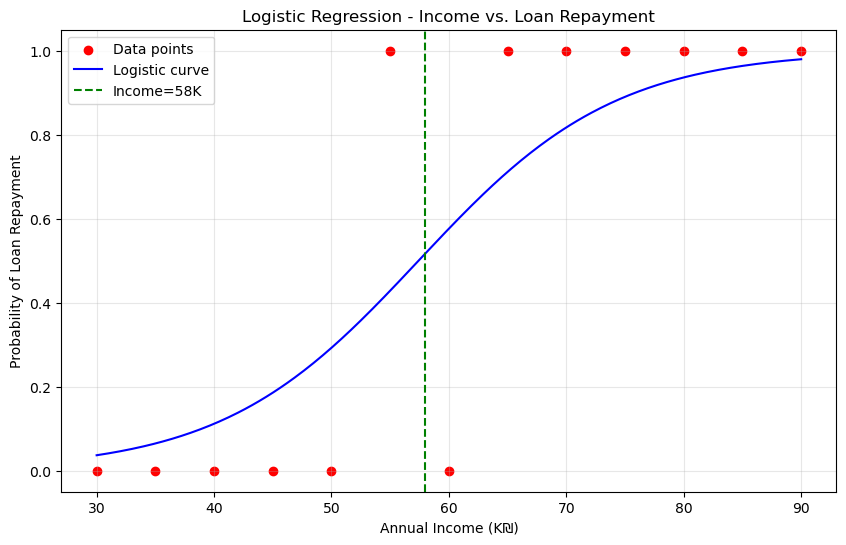

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# 1. Data 
X = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90], dtype=float).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=float).reshape(-1, 1)

# 2. Normalization 
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# 3. Build the ANN (single neuron with sigmoid)
model = Sequential([
    Input(shape=(1,)),               
    Dense(1, activation='sigmoid')   
])

# 4. Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_s, y, epochs=2000, verbose=0)

# Predictions 
probs = model.predict(X_s, verbose=0)
preds = (probs > 0.5).astype(int)

print("X: ", [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,90])
print("Predicted probabilities:", np.round(probs.ravel(), 3))
print("Predicted classes:", preds.ravel())

# Accuracy on the full dataset
acc = accuracy_score(y, preds)
print(f"\nModel accuracy on training data = {acc:.3f}")

# Prediction for 58K
income_58_scaled = scaler.transform([[58]])
prob_58 = model.predict(income_58_scaled, verbose=0)[0][0]
print(f"\nPrediction for 58K income: Estimated probability = {prob_58:.3f}")

# Logistic graph
X_range = np.linspace(30, 90, 300).reshape(-1, 1)     
X_range_s = scaler.transform(X_range)                 
y_pred_range = model.predict(X_range_s, verbose=0)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', marker='o', label='Data points')           
plt.plot(X_range, y_pred_range, color='blue', label='Logistic curve')      
plt.axvline(x=58, color='green', linestyle='--', label='Income=58K')       

plt.title('Logistic Regression - Income vs. Loan Repayment')
plt.xlabel('Annual Income (K₪)')
plt.ylabel('Probability of Loan Repayment')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(-0.05, 1.05)
plt.show()